In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

school = pd.read_csv('학교/seoul_school_xy.csv', encoding='cp949', index_col=0)


# 데이터 불러오기

In [2]:
# school 데이터에서 초,중,고,대학교 분류하기
df = school.copy()

# 대학교 행만 추출 
school_university = school[school['학교종류명'].str.contains('대학', regex=True)]
# 원격교육 대학교 제외
## '학교종류명' 열에서 '방송통신대학' 또는 '사이버대학(대학)'을 포함하지 않는 행만 필터링
school_university = school_university[~school_university['학교종류명'].str.contains('방송통신대학|사이버대학\(대학\)', regex=True)]

# 초등학교 행만 추출
school_elementary = school[school['학교종류명']=='초등학교']
# 중학교 행만 추출
school_middle = school[school['학교종류명']=='중학교']
# 고등학교 행만 추출
school_high = school[school['학교종류명']=='고등학교']

# csv 파일로
school_university.to_csv("학교/school_university.csv", index=False, encoding='utf-8-sig')
school_high.to_csv("학교/school_high.csv", index=False, encoding='utf-8-sig')
school_middle.to_csv("학교/school_middle.csv", index=False, encoding='utf-8-sig')
school_elementary.to_csv("학교/school_elementary.csv", index=False, encoding='utf-8-sig')


In [3]:
element = school_elementary.copy()
middle = school_middle.copy()
high = school_high.copy()
univ = school_university.copy()

# 데이터 전처리

## 학교

### 초등학교

In [86]:
element.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교종류명   610 non-null    object 
 1   학교명     610 non-null    object 
 2   주소      610 non-null    object 
 3   x       610 non-null    float64
 4   y       610 non-null    float64
dtypes: float64(2), object(3)
memory usage: 28.6+ KB


In [12]:
gu1 = element['주소'].str.extract(r'(\w+구)')
gu1.columns = ['자치구']

In [13]:
element_gu = pd.concat([element, gu1], axis=1)

In [14]:
gu_counts = element_gu['자치구'].value_counts().reset_index()

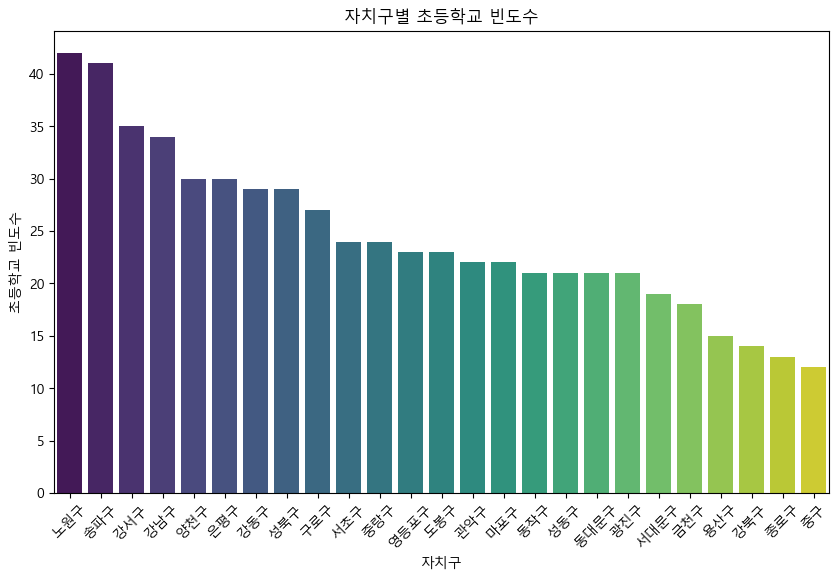

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호가 깨지는 문제 해결

plt.figure(figsize=(10,6))
sns.barplot(data=gu_counts, x='자치구', y='count', palette='viridis')
plt.title('자치구별 초등학교 빈도수')
plt.xlabel('자치구')
plt.ylabel('초등학교 빈도수')
plt.xticks(rotation=45)
plt.show()

### 중학교 

In [84]:
middle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 610 to 998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교종류명   389 non-null    object 
 1   학교명     389 non-null    object 
 2   주소      389 non-null    object 
 3   x       389 non-null    float64
 4   y       389 non-null    float64
dtypes: float64(2), object(3)
memory usage: 26.3+ KB


In [8]:
gu2 = middle['주소'].str.extract(r'(\w+구)')
gu2.columns = ['자치구']

In [9]:
middle_gu = pd.concat([middle, gu2], axis=1)

In [10]:
gu_counts2 = middle_gu['자치구'].value_counts().reset_index()

In [11]:
middle_gu['자치구'].value_counts()

자치구
송파구     29
노원구     26
강남구     24
강서구     22
강동구     19
양천구     19
성북구     18
은평구     18
서초구     16
동작구     16
관악구     16
동대문구    15
서대문구    14
마포구     14
중랑구     14
구로구     14
강북구     13
도봉구     13
광진구     12
영등포구    12
성동구     11
종로구      9
용산구      9
금천구      9
중구       8
Name: count, dtype: int64

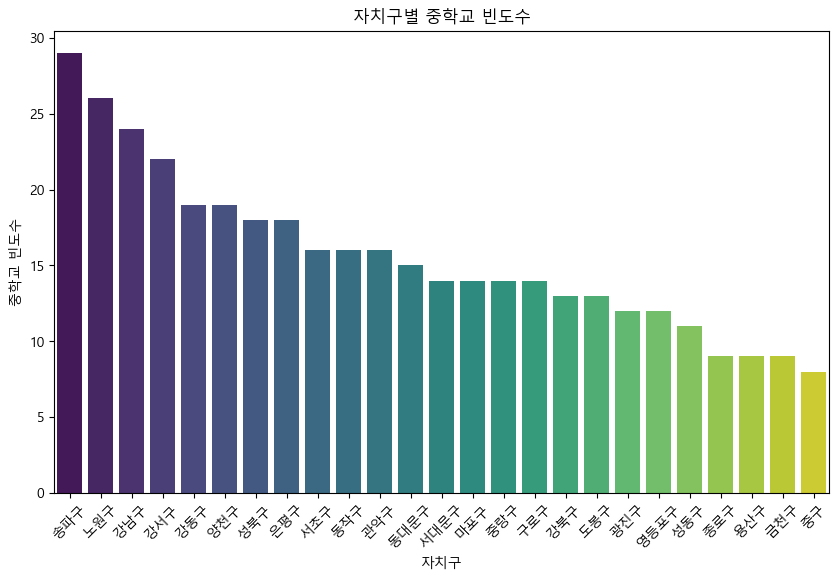

In [127]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호가 깨지는 문제 해결

plt.figure(figsize=(10,6))
sns.barplot(data=gu_counts2, x='자치구', y='count', palette='viridis')
plt.title('자치구별 중학교 빈도수')
plt.xlabel('자치구')
plt.ylabel('중학교 빈도수')
plt.xticks(rotation=45)
plt.show()

### 고등학교

In [63]:
high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 1000 to 1317
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교종류명   318 non-null    object 
 1   학교명     318 non-null    object 
 2   주소      318 non-null    object 
 3   x       318 non-null    float64
 4   y       318 non-null    float64
dtypes: float64(2), object(3)
memory usage: 14.9+ KB


In [4]:
gu3 = high['주소'].str.extract(r'(\w+구)')
gu3.columns = ['자치구']

In [5]:
high_gu = pd.concat([high, gu3], axis=1)

In [6]:
gu_counts3 = high_gu['자치구'].value_counts().reset_index()

In [7]:
high_gu['자치구'].value_counts()

자치구
노원구     25
강서구     23
강남구     22
송파구     20
은평구     18
관악구     17
양천구     15
종로구     14
강동구     14
구로구     14
성북구     13
서초구     11
중구      11
동대문구    11
용산구     10
중랑구     10
광진구      9
영등포구     9
도봉구      9
마포구      9
강북구      7
서대문구     7
성동구      7
동작구      7
금천구      6
Name: count, dtype: int64

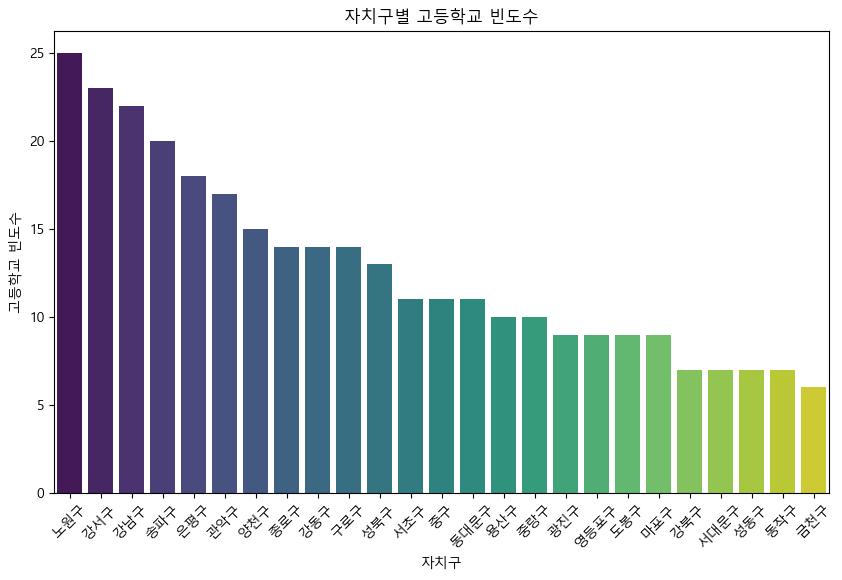

In [131]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호가 깨지는 문제 해결

plt.figure(figsize=(10,6))
sns.barplot(data=gu_counts3, x='자치구', y='count', palette='viridis')
plt.title('자치구별 고등학교 빈도수')
plt.xlabel('자치구')
plt.ylabel('고등학교 빈도수')
plt.xticks(rotation=45)
plt.show()

### 대학교

In [64]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1318 to 1379
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교종류명   59 non-null     object 
 1   학교명     59 non-null     object 
 2   주소      59 non-null     object 
 3   x       59 non-null     float64
 4   y       59 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.8+ KB


In [133]:
gu4 = univ['주소'].str.extract(r'(\w+구)')
gu4.columns = ['자치구']

In [134]:
univ_gu = pd.concat([univ, gu4], axis=1)

In [135]:
gu_counts4 = univ_gu['자치구'].value_counts().reset_index()

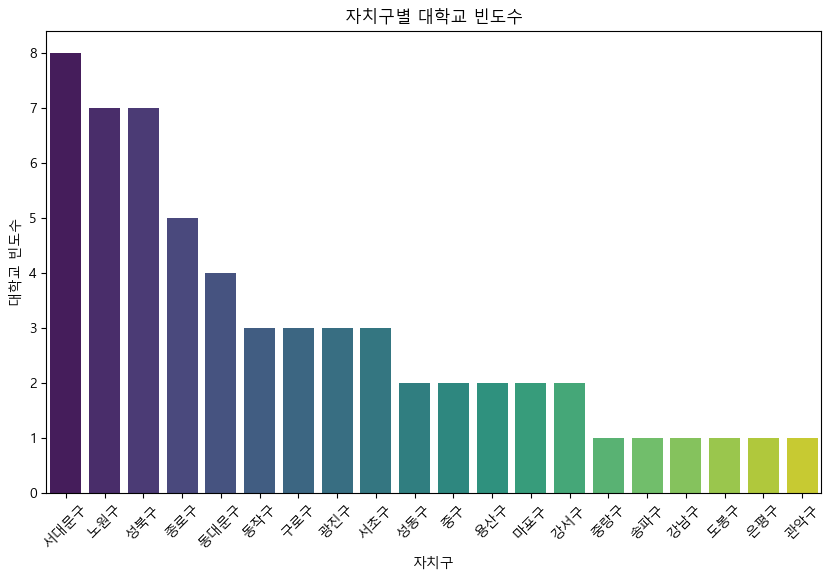

In [136]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호가 깨지는 문제 해결

plt.figure(figsize=(10,6))
sns.barplot(data=gu_counts4, x='자치구', y='count', palette='viridis')
plt.title('자치구별 대학교 빈도수')
plt.xlabel('자치구')
plt.ylabel('대학교 빈도수')
plt.xticks(rotation=45)
plt.show()

### 전체 학교 데이터

In [140]:
school.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 0 to 1381
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교종류명   1382 non-null   object 
 1   학교명     1382 non-null   object 
 2   주소      1382 non-null   object 
 3   x       1382 non-null   float64
 4   y       1382 non-null   float64
dtypes: float64(2), object(3)
memory usage: 64.8+ KB


In [16]:
gu5 = school['주소'].str.extract(r'(\w+구)')
gu5.columns = ['자치구']

In [17]:
school_gu = pd.concat([school, gu5], axis=1)

In [18]:
gu_counts5 = school_gu['자치구'].value_counts().reset_index()

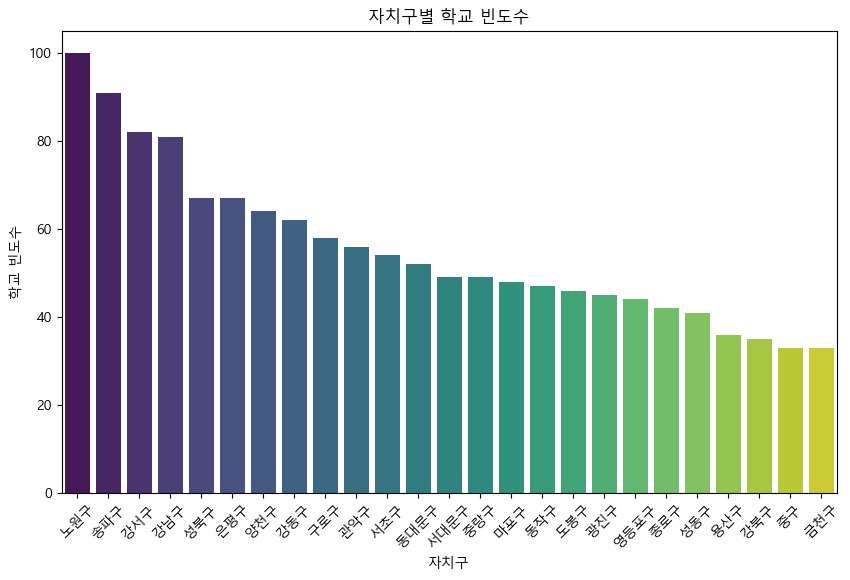

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
sns.barplot(data=gu_counts5, x='자치구', y='count', palette='viridis')
plt.title('자치구별 학교 빈도수')
plt.xlabel('자치구')
plt.ylabel('학교 빈도수')
plt.xticks(rotation=45)
plt.show()

In [159]:
yx = school[school['x'] < 120].index

In [160]:
school

,학교종류명,학교명,주소,x,y
0,초등학교,서울숭신초등학교,서울특별시 성동구 마장로 161,127.027827,37.567935
1,초등학교,한양초등학교,서울특별시 성동구 살곶이길 208,127.050387,37.557611
2,초등학교,세종초등학교,서울특별시 광진구 군자로 114,127.072906,37.553032
3,초등학교,성동초등학교,서울특별시 광진구 자양로4길 63,127.089527,37.533178
4,초등학교,서울행현초등학교,서울특별시 성동구 행당로 95,127.029405,37.557692
...,...,...,...,...,...
1377,교육대학,서울교육대학교,서울 서초구 서초중앙로 96(서초동 1650),127.016861,37.490378
1378,일반대학,서울기독대학교,서울 은평구 갈현로 4길 26-2호,126.912654,37.600634
1379,일반대학,서울대학교,서울 관악구 관악로 1 서울대학교,126.952239,37.464007
1380,사이버대학(대학),서울디지털대학교,서울 마포구 도화동 560번지,126.947860,37.542974


In [161]:
for i in yx:
    y = school.iloc[i, 3]
    x = school.iloc[i, 4]
    school.iloc[i, 3] = x
    school.iloc[i, 4] = y

In [166]:
from geopy.distance import geodesic

# 각 학교에서 가장 가까운 다른 학교의 거리 계산 함수
def nearest_other_school_distance(school_row):
    school_location = (school_row['y'], school_row['x'])
    # 현재 학교를 제외한 다른 학교들과의 거리 계산
    distances = school.apply(
        lambda row: geodesic((row['y'], row['x']), school_location).meters 
        if row['학교명'] != school_row['학교명'] else float('inf'),
        axis=1
    )
    # 가장 가까운 다른 학교 거리 반환
    return distances.min()

# 각 사용자 위치에 대해 가장 가까운 학교 거리 계산
school['nearest_school'] = school.apply(nearest_other_school_distance, axis=1)


In [167]:
school

,학교종류명,학교명,주소,x,y,nearest_school
0,초등학교,서울숭신초등학교,서울특별시 성동구 마장로 161,127.027827,37.567935,157.877463
1,초등학교,한양초등학교,서울특별시 성동구 살곶이길 208,127.050387,37.557611,72.416563
2,초등학교,세종초등학교,서울특별시 광진구 군자로 114,127.072906,37.553032,193.685277
3,초등학교,성동초등학교,서울특별시 광진구 자양로4길 63,127.089527,37.533178,100.910780
4,초등학교,서울행현초등학교,서울특별시 성동구 행당로 95,127.029405,37.557692,241.950168
...,...,...,...,...,...,...
1377,교육대학,서울교육대학교,서울 서초구 서초중앙로 96(서초동 1650),127.016861,37.490378,0.000000
1378,일반대학,서울기독대학교,서울 은평구 갈현로 4길 26-2호,126.912654,37.600634,214.336517
1379,일반대학,서울대학교,서울 관악구 관악로 1 서울대학교,126.952239,37.464007,908.346233
1380,사이버대학(대학),서울디지털대학교,서울 마포구 도화동 560번지,126.947860,37.542974,168.984237


In [175]:
nearest_school = school[school['nearest_school']!=0.0]

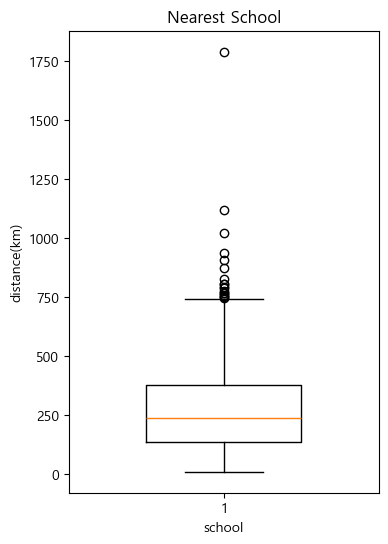

In [192]:
plt.figure(figsize=(4,6))
plt.boxplot(nearest_school['nearest_school'], widths=0.5)
plt.xlabel('school')
plt.ylabel('distance(km)')
plt.title('Nearest School')
plt.show()

In [33]:
school.head()

,학교종류명,학교명,주소,x,y
0,초등학교,서울숭신초등학교,서울특별시 성동구 마장로 161,127.027827,37.567935
1,초등학교,한양초등학교,서울특별시 성동구 살곶이길 208,127.050387,37.557611
2,초등학교,세종초등학교,서울특별시 광진구 군자로 114,127.072906,37.553032
3,초등학교,성동초등학교,서울특별시 광진구 자양로4길 63,127.089527,37.533178
4,초등학교,서울행현초등학교,서울특별시 성동구 행당로 95,127.029405,37.557692


## 대중교통

### 지하철역

In [36]:
subway = pd.read_csv('지도/Subwaystation_Seoul5.csv')
subway.head()

,SubST_NM,CRDNT_X,CRDNT_Y
0,가락시장,37.492522,127.118234
1,종로3가,37.571607,126.991806
2,오금,37.502162,127.128111
3,동대문,37.571420,127.009745
4,동대문역사문화공원,37.565138,127.007896


In [37]:
subway[subway['CRDNT_X'].duplicated()]

,SubST_NM,CRDNT_X,CRDNT_Y
265,경기광주,37.399907,126.630347
511,서부여성회관,37.506193,126.676203
543,봉은사,37.514219,127.060245


In [38]:
subway[subway['CRDNT_X'] == 37.399907]

,SubST_NM,CRDNT_X,CRDNT_Y
116,국제업무지구,37.399907,126.630347
265,경기광주,37.399907,126.630347


두 지하철역은 다른 지역에 있지만, 경기 및 인천이기 때문에 삭제한다.

In [39]:
subway.drop([116, 265], axis=0, inplace=True)

In [40]:
subway[subway['CRDNT_X'] == 37.506193]

,SubST_NM,CRDNT_X,CRDNT_Y
510,석남,37.506193,126.676203
511,서부여성회관,37.506193,126.676203


둘다 인천이므로 삭제한다.

In [41]:
subway.drop([510, 511], axis=0, inplace=True)

In [42]:
subway[subway['CRDNT_X'] == 37.514219]

,SubST_NM,CRDNT_X,CRDNT_Y
185,노량진,37.514219,126.942454
543,봉은사,37.514219,127.060245


y 좌표만 다르므로, 삭제하지 않고 진행한다.

In [43]:
subway[subway[['CRDNT_X', 'CRDNT_Y']].duplicated()]

,SubST_NM,CRDNT_X,CRDNT_Y


In [44]:
for i in range(len(subway)):
    y = subway.iloc[i, 1]
    x = subway.iloc[i, 2]
    subway.iloc[i, 1] = x
    subway.iloc[i, 2] = y

In [45]:
subway[subway['CRDNT_X']< 120]

,SubST_NM,CRDNT_X,CRDNT_Y


In [46]:
subway.columns = ['역명', 'x', 'y']

In [47]:
subway.to_csv('지도/subway_final.csv', index=False)

In [48]:
subway.head()

,역명,x,y
0,가락시장,127.118234,37.492522
1,종로3가,126.991806,37.571607
2,오금,127.128111,37.502162
3,동대문,127.009745,37.571420
4,동대문역사문화공원,127.007896,37.565138


### 버스정류장

In [49]:
bus = pd.read_csv('지도/Busstation_Selected.csv')
bus.head()

,정류장명,x,y
0,종로2가사거리,126.987752,37.569806
1,창경궁.서울대학교병원,126.996521,37.579433
2,명륜3가.성대입구,126.998251,37.582580
3,종로2가.삼일교,126.987613,37.568579
4,혜화동로터리.여운형활동터,127.001744,37.586243


In [50]:
bus = bus.drop_duplicates()

In [51]:
bus

,정류장명,x,y
0,종로2가사거리,126.987752,37.569806
1,창경궁.서울대학교병원,126.996521,37.579433
2,명륜3가.성대입구,126.998251,37.582580
3,종로2가.삼일교,126.987613,37.568579
4,혜화동로터리.여운형활동터,127.001744,37.586243
...,...,...,...
48433,이수역5번출구,126.984207,37.485489
49157,서울일원우체국,127.087627,37.491997
49306,개포3일원1동통합주민센터,127.075381,37.492389
49383,서울일원우체국,127.087796,37.492022


In [52]:
bus.columns = ['정류장명', 'x', 'y']

In [53]:
bus.to_csv('지도/bus_final.csv', index=False)

In [54]:
bus.head()

,정류장명,x,y
0,종로2가사거리,126.987752,37.569806
1,창경궁.서울대학교병원,126.996521,37.579433
2,명륜3가.성대입구,126.998251,37.582580
3,종로2가.삼일교,126.987613,37.568579
4,혜화동로터리.여운형활동터,127.001744,37.586243


## 은행

In [55]:
bank = pd.read_csv('은행/bank_crol_1007.csv', encoding='cp949')
bank.head()

,은행,지점,주소,x,y
0,IBK기업은행,LG광화문,서울특별시 종로구 신문로2가 새문안로 58,126.971586,37.569311
1,IBK기업은행,MBC,서울특별시 마포구 성암로 267,126.890989,37.581123
2,IBK기업은행,가락동,서울특별시 송파구 중대로 97,127.119352,37.493175
3,IBK기업은행,가산IT밸리,서울특별시 금천구 가산디지털2로 53,126.881148,37.472973
4,IBK기업은행,가산동,서울특별시 금천구 가산디지털2로 184,126.878042,37.484256


In [56]:
bank[bank[['x','y']].duplicated(keep=False)]

,은행,지점,주소,x,y
6,IBK기업은행,가산디지털역,서울특별시 금천구 가산디지털1로 168,126.882636,37.479967
7,IBK기업은행,가산디지털중앙,서울특별시 금천구 가산디지털2로 98,126.881057,37.477227
11,IBK기업은행,강남WM센터,서울특별시 강남구 언주로30길 21,127.052011,37.488902
14,IBK기업은행,강남기업금융센터,서울특별시 강남구 강남대로 390,127.028709,37.497901
26,IBK기업은행,구로동,서울특별시 구로구 디지털로32길 55,126.898304,37.483983
...,...,...,...,...,...
1307,국민은행,명동스타PB센터,"서울 중구 을지로 51, 6층 (을지로2가,내외빌딩)",126.983699,37.566496
1309,국민은행,올림픽PB센터,"서울특별시 송파구 양재대로 1222,(방이동)",127.131064,37.515729
1310,국민은행,목동PB센터,"서울특별시 양천구 목동동로 381,2층(목동)",126.879045,37.535736
1313,국민은행,강남스타PB센터,"서울특별시 강남구 테헤란로 152,21층(역삼동,강남파이낸스센터)",127.036546,37.500026


In [57]:
yx = bank[bank['x'] < 120].index

In [58]:
yx = bank[bank['x'] < 120].index
for i in yx:
    y = bank.iloc[i, 3]
    x = bank.iloc[i, 4]
    bank.iloc[i, 3] = x
    bank.iloc[i, 4] = y

In [59]:
bank.to_csv('은행/seoul_bank_final.csv', index=False)

In [61]:
bank['은행'].value_counts()

은행
우리은행       296
국민은행       291
하나은행       235
IBK기업은행    187
NH농협은행     158
SC제일은행      72
Sh수협은행      58
KDB산업은행     18
Name: count, dtype: int64

은행의 경우 한 건물 내에 다른 은행이 있을 경우, 좌표가 같은 것으로 확인됨.

## 병원

In [1]:
import pandas as pd
hospital = pd.read_csv('병원/seoul_hospital.csv', encoding='cp949', index_col='Unnamed: 0')
hospital.head()

,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지면적,도로명주소,사업장명,업태구분명,0,1,x,y
0,2005-12-07,NaN,1,영업/정상,영업중,NaN,NaN,NaN,NaN,4755.54,서울특별시 성북구 화랑로 271 (장위동),의료법인유라의료재단 온누리요양병원,요양병원(일반요양병원),서울특별시 성북구 화랑로 271 (장위동),NaN,127.058799,37.612176
1,2007-10-23,NaN,1,영업/정상,영업중,NaN,NaN,NaN,NaN,2337.69,서울특별시 동작구 시흥대로 634 (신대방동),의료법인에이치엠피의료재단녹십초요양병원,요양병원(일반요양병원),서울특별시 동작구 시흥대로 634 (신대방동),NaN,126.906635,37.488395
2,2022-09-23,NaN,1,영업/정상,영업중,NaN,NaN,NaN,NaN,2544.15,"서울특별시 도봉구 덕릉로 215, 3~7층 (창동)",자향한방병원,한방병원,서울특별시 도봉구 덕릉로 215,3~7층 (창동),127.036585,37.637513
4,1993-01-09,NaN,1,영업/정상,영업중,NaN,NaN,NaN,NaN,958.25,"서울특별시 송파구 문정로 65, 인애가한방병원 1,2,4,5,6층 (문정동)",의료법인일맥의료재단 송파인애가한방병원,한방병원,서울특별시 송파구 문정로 65,"인애가한방병원 1,2,4,5,6층 (문정동)",127.129509,37.487270
7,2009-11-30,NaN,1,영업/정상,영업중,NaN,NaN,NaN,NaN,2201.90,"서울특별시 강남구 역삼로 245, 지하2층일부 1층일부 2~7층 (역삼동)",하나이비인후과병원,병원,서울특별시 강남구 역삼로 245,지하2층일부 1층일부 2~7층 (역삼동),127.042990,37.497928


In [3]:
hospital['업태구분명'].value_counts()

업태구분명
병원                 226
요양병원(일반요양병원)       106
한방병원                90
종합병원                59
치과병원                57
정신병원                12
요양병원(노인병원)           2
요양병원(장애인의료재활시설)      1
Name: count, dtype: int64

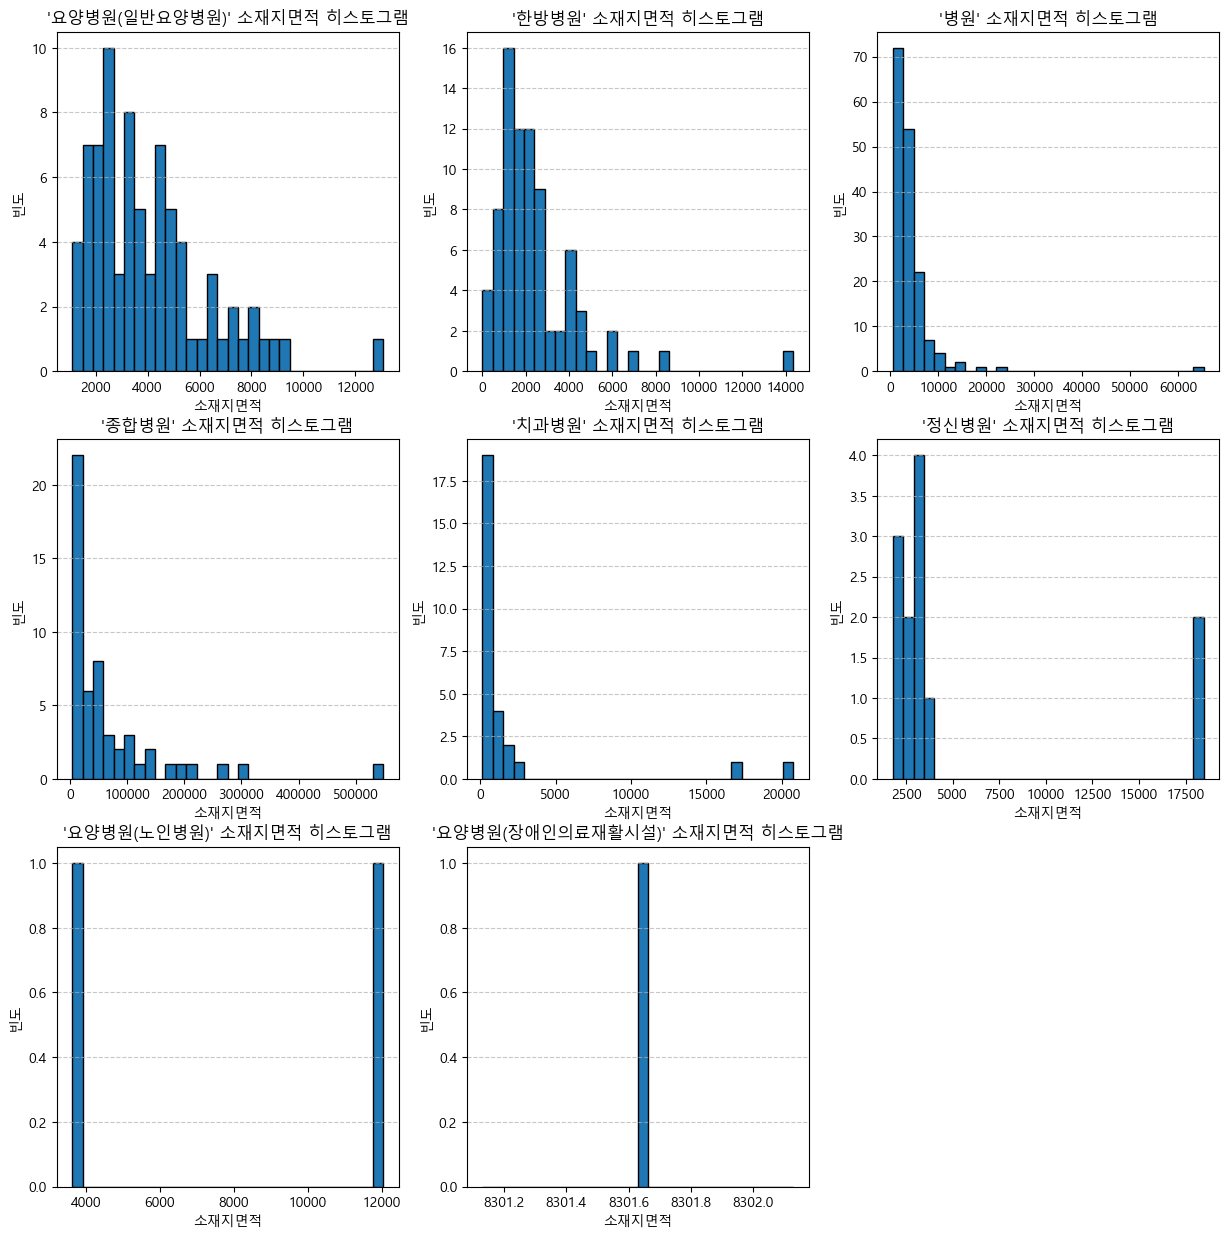

In [268]:
# 범주형 값들 가져오기
categories = hospital['업태구분명'].unique()
num_categories = len(categories)

# 서브플롯 설정
fig, axes = plt.subplots(nrows=(num_categories + 2) // 3, ncols=3, figsize=(15, 5 * ((num_categories + 2) // 3)))
axes = axes.flatten()  # 인덱싱을 편하게 하기 위해 flatten

# 각 카테고리에 대한 히스토그램 생성
for i, category in enumerate(categories):
    subset = hospital[hospital['업태구분명'] == category]
    axes[i].hist(subset['소재지면적'], bins=30, edgecolor='black')
    axes[i].set_title(f"'{category}' 소재지면적 히스토그램")
    axes[i].set_xlabel('소재지면적')
    axes[i].set_ylabel('빈도')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 빈 서브플롯 숨기기
for j in range(i + 1, len(axes)):
    axes[j].axis('off')


필요없는 열 제거

In [243]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 0 to 890
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   인허가일자    553 non-null    object 
 1   인허가취소일자  0 non-null      float64
 2   영업상태코드   553 non-null    int64  
 3   영업상태명    553 non-null    object 
 4   상세영업상태명  553 non-null    object 
 5   폐업일자     0 non-null      float64
 6   휴업시작일자   5 non-null      object 
 7   휴업종료일자   5 non-null      object 
 8   재개업일자    0 non-null      float64
 9   소재지면적    419 non-null    float64
 10  도로명주소    553 non-null    object 
 11  사업장명     553 non-null    object 
 12  업태구분명    553 non-null    object 
 13  0        553 non-null    object 
 14  1        375 non-null    object 
 15  x        553 non-null    float64
 16  y        553 non-null    float64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.8+ KB


In [2]:
hospital.drop(['인허가일자','인허가취소일자','영업상태코드','영업상태명','상세영업상태명','폐업일자','휴업시작일자','휴업종료일자','재개업일자',
               '0','1'], axis=1, inplace=True)

In [5]:
gu6 = hospital['도로명주소'].str.extract(r'(\w+구)')
gu6.columns = ['자치구']

In [253]:
hospital_gu = pd.concat([hospital, gu6], axis=1)

In [254]:
gu_counts6 = hospital_gu['자치구'].value_counts().reset_index()

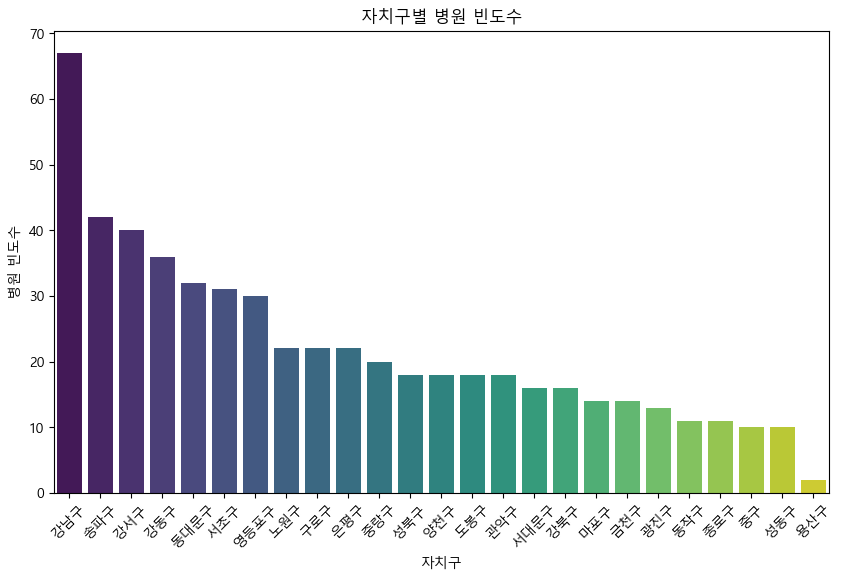

In [257]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호가 깨지는 문제 해결

plt.figure(figsize=(10,6))
sns.barplot(data=gu_counts6, x='자치구', y='count', palette='viridis')
plt.title('자치구별 병원 빈도수')
plt.xlabel('자치구')
plt.ylabel('병원 빈도수')
plt.xticks(rotation=45)
plt.show()

In [4]:
hospital[hospital[['x','y']].duplicated()]

,소재지면적,도로명주소,사업장명,업태구분명,x,y
101,1792.32,"서울특별시 강동구 양재대로 1461, SC MEDI TOWER 2,4,5층 (길동)",위드힘병원,병원,127.139105,37.536395
133,1675.36,"서울특별시 노원구 동일로 987, 지하1,1,3,4,6,8층 (공릉동)",참다운요양병원,요양병원(일반요양병원),127.074940,37.618260
205,47530.54,서울특별시 강동구 동남로 892 (상일동),강동경희대학교의대병원,종합병원,127.157673,37.553536
214,202988.00,서울특별시 종로구 대학로 101 (연건동),서울대학교병원,종합병원,126.999017,37.579715
215,1100.98,서울특별시 강동구 동남로 892 (상일제1동),강동경희대학교치과병원,치과병원,127.157673,37.553536
329,2219.00,"서울특별시 동대문구 경희대로 23 (회기동, 경희의료원)",경희대학교치과병원,치과병원,127.051852,37.594119
335,NaN,서울특별시 동대문구 망우로 82 (휘경동),삼육치과병원,치과병원,127.065307,37.587991
336,14350.83,서울특별시 동대문구 경희대로 23 (회기동),경희대학교한방병원,한방병원,127.051852,37.594119
350,17156.56,서울특별시 서대문구 연세로 50-1 (신촌동),연세대학교치과대학치과병원,치과병원,126.940827,37.562345
374,4708.95,서울특별시 성북구 종암로 72 (종암동),의료법인서광의료재단 성북중앙병원,병원,127.035623,37.596762


병원도 같은 건물에 다른 병원이 있기 때문에 지우지 않고 진행한다.

In [21]:
hospital[hospital['업태구분명']=='종합병원']['소재지면적'].quantile(0.25)

np.float64(9799.51)

In [26]:
# 종합병원 면적의 최솟값과 최댓값 차이가 매우 크므로 quantile(0.25)과 분포를 고려하여 면적이 10000m^2 이상인 병원은 종합병원급 병원으로 간주한다.
hospital_big = hospital[(hospital['업태구분명']=='종합병원') | (hospital['소재지면적'] >= 10000)]
hospital_re = hospital[(hospital['업태구분명']!='종합병원') | (hospital['소재지면적'] <= 10000)]

In [27]:
hospital_big.to_csv('병원/seoul_hospital_big.csv', index=False)
hospital_re.to_csv('병원/seoul_hospital_re.csv', index=False)

### 종합병원/일반병원 자치구별 개수

In [20]:
hospital_big = pd.read_csv('병원/seoul_hospital_big.csv')
hospital_re = pd.read_csv('병원/seoul_hospital_re.csv')

In [21]:
gu7 = hospital_big['도로명주소'].str.extract(r'(\w+구)')
gu7.columns = ['자치구']

In [22]:
hospital_big_gu = pd.concat([hospital_big, gu7], axis=1)

In [23]:
gu_counts7 = hospital_big_gu['자치구'].value_counts().reset_index()

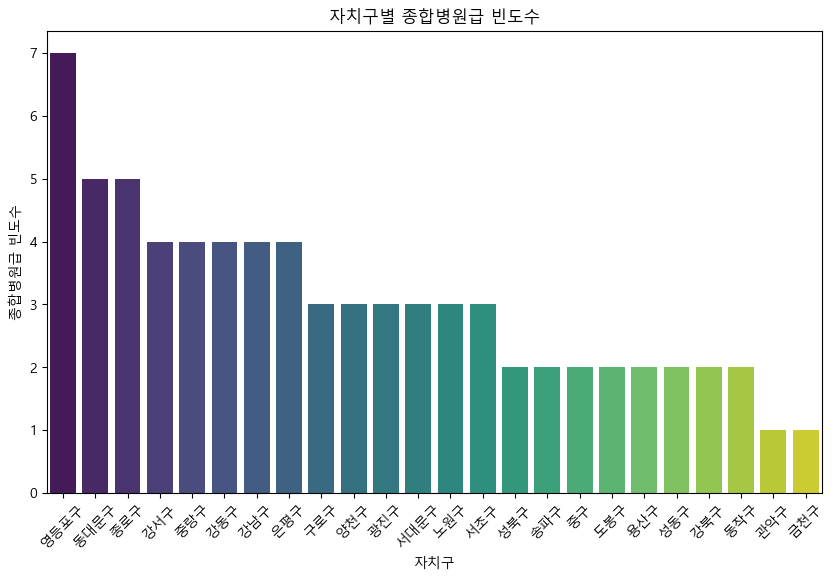

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호가 깨지는 문제 해결

plt.figure(figsize=(10,6))
sns.barplot(data=gu_counts7, x='자치구', y='count', palette='viridis')
plt.title('자치구별 종합병원급 빈도수')
plt.xlabel('자치구')
plt.ylabel('종합병원급 빈도수')
plt.xticks(rotation=45)
plt.show()

In [27]:
gu8 = hospital_re['도로명주소'].str.extract(r'(\w+구)')
gu8.columns = ['자치구']

In [28]:
hospital_re_gu = pd.concat([hospital_re, gu8], axis=1)

In [29]:
gu_counts8 = hospital_re_gu['자치구'].value_counts().reset_index()

In [31]:
hospital_re_gu['자치구'].value_counts()

자치구
강남구     64
송파구     40
강서구     36
강동구     33
서초구     30
동대문구    29
영등포구    26
은평구     20
구로구     20
노원구     19
중랑구     18
성북구     17
관악구     17
도봉구     17
강북구     16
서대문구    15
양천구     15
마포구     14
금천구     14
광진구     12
동작구      9
성동구      9
중구       9
종로구      8
용산구      1
Name: count, dtype: int64

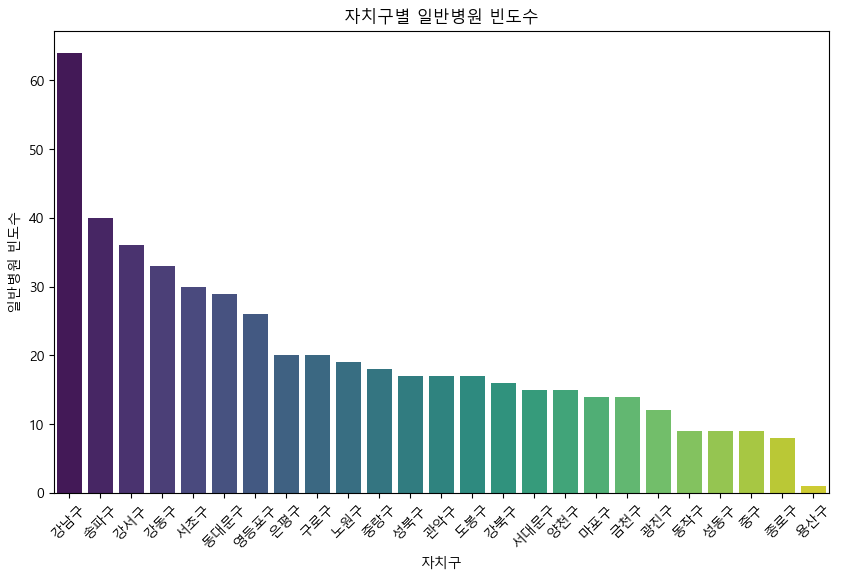

In [30]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호가 깨지는 문제 해결

plt.figure(figsize=(10,6))
sns.barplot(data=gu_counts8, x='자치구', y='count', palette='viridis')
plt.title('자치구별 일반병원 빈도수')
plt.xlabel('자치구')
plt.ylabel('일반병원 빈도수')
plt.xticks(rotation=45)
plt.show()

## +) x좌표, y좌표가 반대로 들어간 데이터가 있는 경우가 있어 데이터 재확인

In [62]:
cafe_data = pd.read_csv("카페/cafedata_1101.csv")
bank_data = pd.read_csv('은행/seoul_bank_final.csv')
elementary_data = pd.read_csv('학교/school_elementary.csv')
middle_data = pd.read_csv('학교/school_middle.csv')
high_data = pd.read_csv('학교/school_high.csv')
univ_data = pd.read_csv('학교/school_university.csv')
hospital_big_data = pd.read_csv('병원/seoul_hospital_big.csv')
hospital_re_data = pd.read_csv('병원/seoul_hospital_re.csv')
subway_data = pd.read_csv('지도/subway_final.csv')
bus_data = pd.read_csv('지도/bus_final.csv')

In [63]:
def yx_change(data):
    yx = list(data[data['x'] < 120].index)
    for i in yx:
        y = data.loc[i]['x']
        x = data.iloc[i]['y']
        data.iloc[i]['x'] = x
        data.iloc[i]['y'] = y

In [64]:
dataa = [cafe_data,bank_data,elementary_data,middle_data,high_data,univ_data,hospital_big_data,hospital_re_data,subway_data,bus_data]

In [65]:
for i in dataa:
    yx_change(i)

In [66]:
def xy_print(data):
    return(data[data['x'] < 120])

In [67]:
for i in dataa:
    xy_print(i)

In [68]:
cafe_data[cafe_data['x']<120]

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,카페명,복층여부,x,y,폐업여부,카페유형,총영업일,월,계절,xy_combined


In [69]:
bank_data[bank_data['x']<120]

,은행,지점,주소,x,y


In [70]:
elementary_data[elementary_data['x']<120]

,학교종류명,학교명,주소,x,y
203,초등학교,서울우면초등학교,서울특별시 서초구 태봉로,37.464880,127.023838
286,초등학교,서울신남초등학교,서울특별시 양천구 남부순환로83길,37.516429,126.844763
583,초등학교,서울장평초등학교,서울특별시 동대문구 답십리로,37.573847,127.073224


In [77]:
yx = elementary_data[elementary_data['x'] < 120].index
for i in yx:
    y = elementary_data.iloc[i, 3]
    x = elementary_data.iloc[i, 4]
    elementary_data.iloc[i, 3] = x
    elementary_data.iloc[i, 4] = y

In [78]:
elementary_data[elementary_data['x']<120]

,학교종류명,학교명,주소,x,y


In [ ]:
middle_data[middle_data['x']<120]

,학교종류명,학교명,주소,x,y
327,중학교,인왕중학교,서울특별시 서대문구 세검정로4길,37.592748,126.951708


In [79]:
yx = middle_data[middle_data['x'] < 120].index
for i in yx:
    y = middle_data.iloc[i, 3]
    x = middle_data.iloc[i, 4]
    middle_data.iloc[i, 3] = x
    middle_data.iloc[i, 4] = y

In [80]:
middle_data[middle_data['x']<120]

,학교종류명,학교명,주소,x,y


In [72]:
univ_data[univ_data['x']<120]

,학교종류명,학교명,주소,x,y
3,전문대학(2년제),서일대학교,서울 중랑구 서일대학길 22(면목동 49-3) 서일대학교,37.586132,127.097475
4,일반대학,성공회대학교,서울 구로구 항동 성공회대학교,37.487797,126.825560
5,일반대학,성균관대학교,서울 종로구 명륜동3가 성균관대학교,37.587953,126.992159
6,일반대학,성신여자대학교,서울 성북구 동선동3가 성신여자대학교,37.591517,127.022883
7,일반대학,세종대학교,서울 광진구 군자동 세종대학교,37.551471,127.073884
11,일반대학,연세대학교,서울 서대문구 신촌동 연세대학교,37.567113,126.939029
19,일반대학,한국성서대학교,서울 노원구 상계7동 한국성서대학교,37.648778,127.064353
22,일반대학,한국체육대학교,서울 송파구 오륜동 한국체육대학교,37.519888,127.130863
25,일반대학,한성대학교,서울 성북구 삼선동3가 389 한성대학교,37.582508,127.010293
27,전문대학(2년제),한양여자대학교,서울 성동구 행당동 살곶이길 200,37.558138,127.049902


In [81]:
yx = univ_data[univ_data['x'] < 120].index
for i in yx:
    y = univ_data.iloc[i, 3]
    x = univ_data.iloc[i, 4]
    univ_data.iloc[i, 3] = x
    univ_data.iloc[i, 4] = y

In [82]:
univ_data[univ_data['x'] < 120]

,학교종류명,학교명,주소,x,y


In [73]:
hospital_big_data[hospital_big_data['x']<120]

,소재지면적,도로명주소,사업장명,업태구분명,x,y


In [74]:
hospital_re_data[hospital_re_data['x']<120]

,소재지면적,도로명주소,사업장명,업태구분명,x,y


In [75]:
subway_data[subway_data['x']<120]


,역명,x,y


In [76]:
bus_data[bus_data['x']<120]


,정류장명,x,y


In [84]:
cafe_data.to_csv("카페/cafedata_1101.csv", index=False)
bank_data.to_csv('은행/seoul_bank_final.csv', index=False)
elementary_data.to_csv('학교/school_elementary.csv', index=False)
middle_data.to_csv('학교/school_middle.csv', index=False)
high_data.to_csv('학교/school_high.csv', index=False)
univ_data.to_csv('학교/school_university.csv', index=False)
hospital_big_data.to_csv('병원/seoul_hospital_big.csv', index=False)
hospital_re_data.to_csv('병원/seoul_hospital_re.csv', index=False)
subway_data.to_csv('지도/subway_final.csv', index=False)
bus_data.to_csv('지도/bus_final.csv', index=False)